## 理解循环神经网络

In [2]:
from keras.layers import SimpleRNN

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#只返回最后一个时间步的输出
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
#返回完整的状态序列
model =Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
#将多个循环层逐个堆叠---需要所有中间层都返回完整的输出序列
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 40,320
Trainable params: 40,320
Non-trainable params: 0
_________________________________________________________________


## 在IMDB数据上应用SimpleRNN

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 1000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train_sequences')
print(len(input_test), 'test_sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train.shape: ',input_train.shape )
print('input_test.shape: ', input_test.shape)


Loading data...
25000 train_sequences
25000 test_sequences
Pad sequences (samples x time)
input_train.shape:  (25000, 500)
input_test.shape:  (25000, 500)


In [9]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 26s - loss: 0.6588 - acc: 0.6032 - val_loss: 0.5433 - val_acc: 0.7422
Epoch 2/10
20000/20000 [==============================] - 25s - loss: 0.4767 - acc: 0.7858 - val_loss: 0.4695 - val_acc: 0.7864
Epoch 3/10
20000/20000 [==============================] - 24s - loss: 0.4140 - acc: 0.8179 - val_loss: 0.4736 - val_acc: 0.8024
Epoch 4/10
20000/20000 [==============================] - 24s - loss: 0.3704 - acc: 0.8442 - val_loss: 0.3837 - val_acc: 0.8330
Epoch 5/10
20000/20000 [==============================] - 24s - loss: 0.3540 - acc: 0.8536 - val_loss: 0.4516 - val_acc: 0.7854
Epoch 6/10
20000/20000 [==============================] - 24s - loss: 0.3378 - acc: 0.8598 - val_loss: 0.4892 - val_acc: 0.7602
Epoch 7/10
20000/20000 [==============================] - 24s - loss: 0.3199 - acc: 0.8687 - val_loss: 0.4022 - val_acc: 0.8360
Epoch 8/10
20000/20000 [==============================]

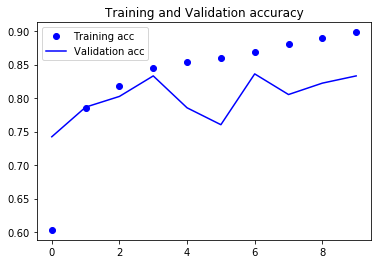

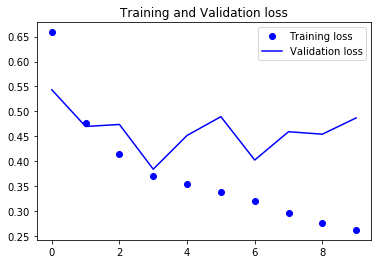

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [12]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 115s - loss: 0.5498 - acc: 0.7268 - val_loss: 0.5460 - val_acc: 0.7840
Epoch 2/10
20000/20000 [==============================] - 132s - loss: 0.3875 - acc: 0.8328 - val_loss: 0.5585 - val_acc: 0.8036
Epoch 3/10
20000/20000 [==============================] - 142s - loss: 0.3587 - acc: 0.8479 - val_loss: 0.6093 - val_acc: 0.7388
Epoch 4/10
20000/20000 [==============================] - 119s - loss: 0.3462 - acc: 0.8560 - val_loss: 0.3649 - val_acc: 0.8564
Epoch 5/10
20000/20000 [==============================] - 122s - loss: 0.3380 - acc: 0.8588 - val_loss: 0.3858 - val_acc: 0.8306
Epoch 6/10
20000/20000 [==============================] - 119s - loss: 0.3267 - acc: 0.8651 - val_loss: 0.3714 - val_acc: 0.8390
Epoch 7/10
20000/20000 [==============================] - 118s - loss: 0.3233 - acc: 0.8655 - val_loss: 0.3863 - val_acc: 0.8494
Epoch 8/10
20000/20000 [========================

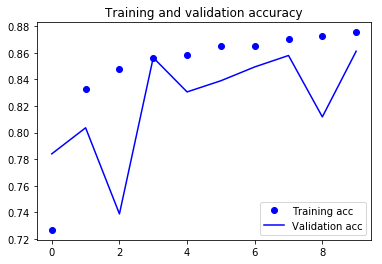

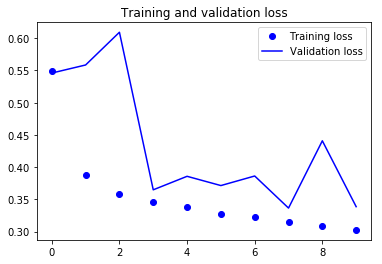

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()